# What can city employees' payroll data tell us?
## -A quick data dive!

### Data source: [Payroll data for NYC employees](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/data)

In [1]:
from plotnine import *
import pandas as pd
df = pd.read_csv('all-employees.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### Cleaning the data
I'm choosing to keep only NYC-specific boroughs: Queens, Manhattan, Brooklyn and Bronx. Data for Staten Island wasn't in the data here, unless, those employees were included in the "other" location.

In [2]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']

In [3]:
df = df[df.borough.isin(boroughs)]

In [4]:
df.head(5)

,year,payroll_no,agency_name,last_name,first_name,mid_int,start_date,borough,title_desc,leave_status,base_salary,pay_basis,reg_hrs,reg_gross_paid,ot_hrs,ot_paid,other_pay
0,2020,17.00,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,8/10/15,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,"86,005.00",per Annum,"1,820.00","84,698.21",0.00,0.00,0.00
1,2020,17.00,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,9/12/16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,"86,005.00",per Annum,"1,820.00","84,698.21",0.00,0.00,0.00
2,2020,17.00,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,2/22/16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,"86,005.00",per Annum,"1,820.00","84,698.21",0.00,0.00,0.00
3,2020,17.00,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,9/16/13,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,"86,005.00",per Annum,"1,820.00","84,698.21",0.00,0.00,0.00
4,2020,17.00,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,4/30/18,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,"86,005.00",per Annum,"1,820.00","84,698.21",0.00,0.00,0.00


🚨 `Editorial choice`


Let's narrow down the dataset to focus only on the employees who worked more hours in overtime than regular hours

In [5]:
ot_extra = df.query('ot_hrs > reg_hrs')

In [6]:
ot_extra

,year,payroll_no,agency_name,last_name,first_name,mid_int,start_date,borough,title_desc,leave_status,base_salary,pay_basis,reg_hrs,reg_gross_paid,ot_hrs,ot_paid,other_pay
2873,2020,25.00,LAW DEPARTMENT,SIEGEL,ANITA,L,2/21/84,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,"68,031.00",per Annum,0.00,952.20,2.00,77.37,51.63
2878,2020,25.00,LAW DEPARTMENT,HARRIS,RICK,NaN,3/15/82,MANHATTAN,CLAIM SPECIALIST,CEASED,"65,737.00",per Annum,0.00,0.00,20.00,833.68,0.00
2884,2020,25.00,LAW DEPARTMENT,WASHINGTON,GUY,A,12/1/03,MANHATTAN,ASSOCIATE QUALITY ASSURANCE SPECIALIST,CEASED,"74,325.00",per Annum,0.00,0.00,13.00,509.12,4.65
2885,2020,25.00,LAW DEPARTMENT,NIEVES,LUIS,A,8/5/13,MANHATTAN,PARALEGAL AIDE,CEASED,"44,897.00",per Annum,0.00,0.00,12.00,364.85,0.00
2887,2020,25.00,LAW DEPARTMENT,FRAZIER,ROBERT,P,3/19/73,BROOKLYN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,"59,785.00",per Annum,0.00,0.00,10.00,349.09,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032878,2017,NaN,FIRE DEPARTMENT,HOPKINS,MICHAEL,W,2/28/94,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,80.02,"24,791.08",114.00,"15,189.39","-8,330.92"
1034527,2017,NaN,FIRE DEPARTMENT,LEHMANN JR.,WILLIAM,J,10/15/99,QUEENS,EMERGENCY MEDICAL SPECIALIST-PARAMEDIC,CEASED,"63,929.00",per Annum,-41.78,49.42,0.00,0.00,-4.66
1041186,2017,NaN,FIRE DEPARTMENT,SIMONETTI,CHRISTINA,J,2/10/14,QUEENS,EMERGENCY MEDICAL SPECIALIST-EMT,ACTIVE,"36,799.00",per Annum,-2.13,727.79,0.00,5.41,"3,024.21"
1042503,2017,NaN,FIRE DEPARTMENT,TUCKER,ROBERT,K,10/23/94,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,0.00,"22,229.02",9.00,"1,757.44","-1,129.45"


In [7]:
ot_extra.last_name.nunique()

805

`Let's plot these 939 employees (remember 805 unique values, and the rest 134 are repeats!)`

#### Preliminary questions to answer with charts:
1. What agencies do these 939 employees work for?
2. What boroughs do they work for?
3. Are most of these employees still working?

In [8]:
ot_extra.to_csv('ot_extra.csv')

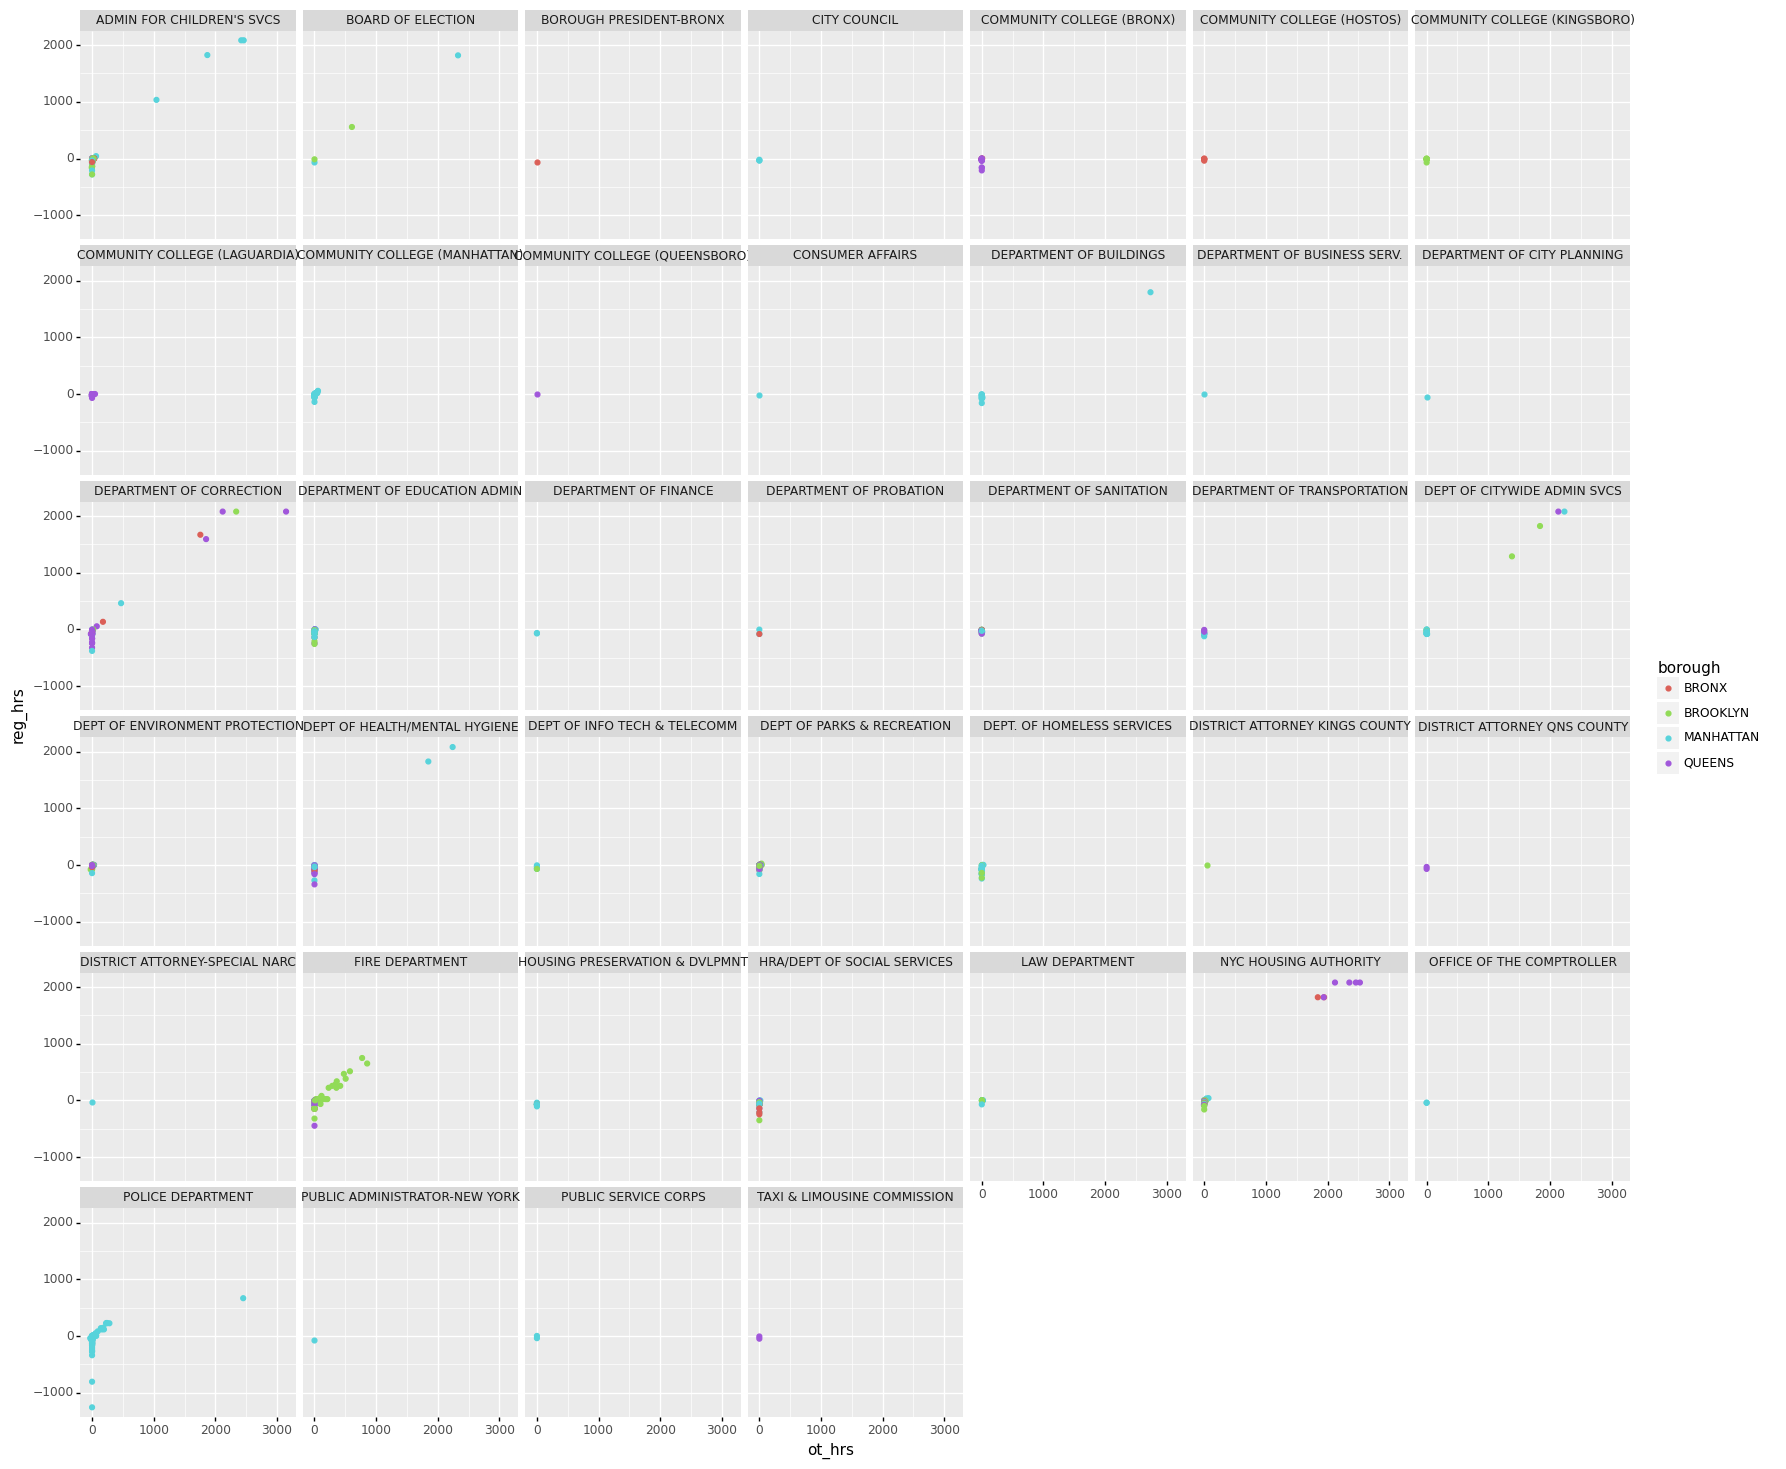

<ggplot: (271748072)>

In [9]:
(
    ggplot(ot_extra,
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='borough'))
        + facet_wrap('agency_name')
        + theme(figure_size=(20, 18))
)

#### 👉🏻  Soo ... Let's narrow to the top three agencies with the most number of employees who have worked extra in overtime

In [12]:
agencies_df = ot_extra.agency_name.value_counts().head(3)
agencies_df

POLICE DEPARTMENT             128
DEPT OF PARKS & RECREATION     80
FIRE DEPARTMENT                76
Name: agency_name, dtype: int64

To plot this further, I'm re-reading the filtered dataset from a new excel — because I couldn't figure out how to do the filtering while plotting.

In [14]:
agencies_df = pd.read_excel('agencies.xlsx')

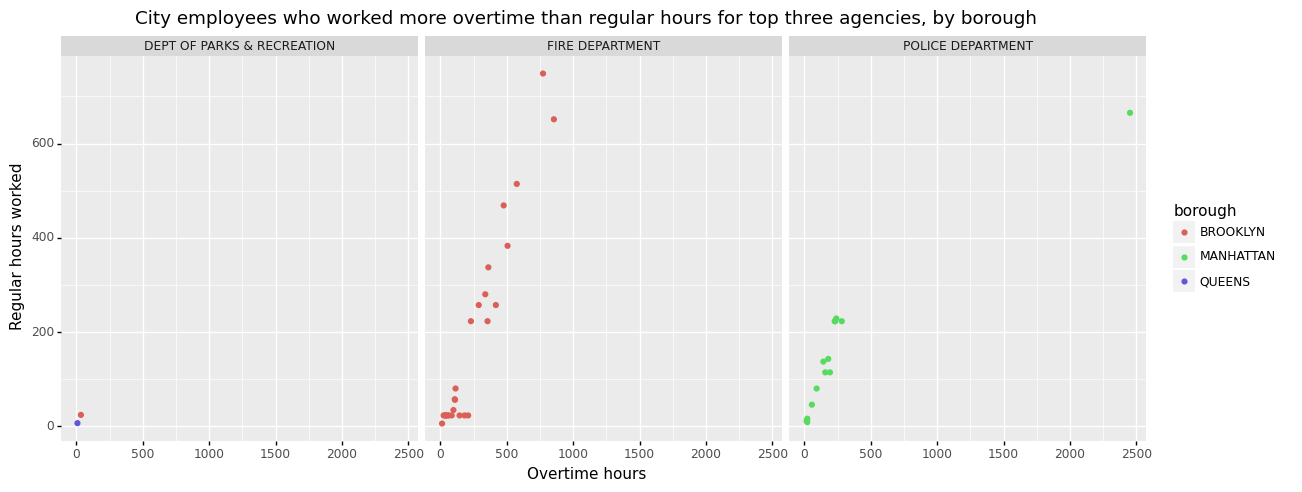

<ggplot: (384038459)>

In [15]:
(
    ggplot(agencies_df.query('reg_hrs > 0'),
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='borough'))
        + facet_wrap('agency_name')
        + theme(figure_size=(14, 5))
        + labs(
            title = "City employees who worked more overtime than regular hours for top three agencies, by borough",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

#### Combining the plot into one chart

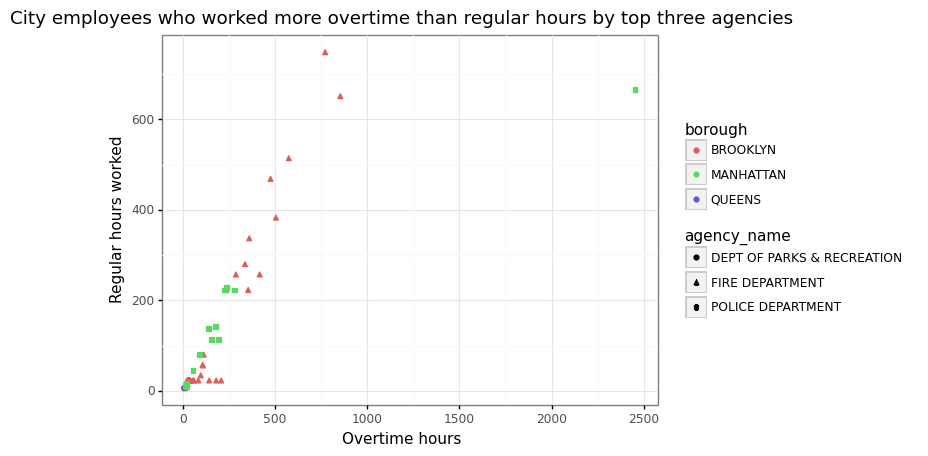

<ggplot: (383888276)>

In [16]:
(
    ggplot(agencies_df.query('reg_hrs > 0'),
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='borough', shape='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by top three agencies",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

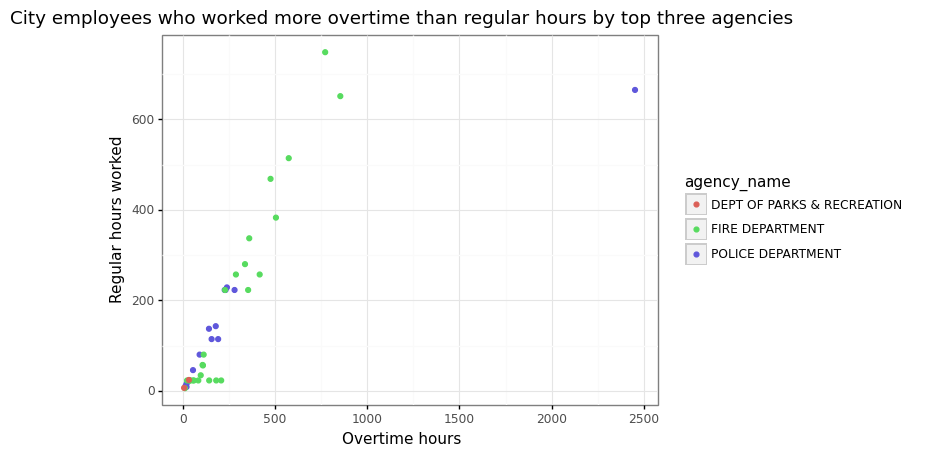

<ggplot: (384015826)>

In [17]:
(
    ggplot(agencies_df.query('reg_hrs > 0'),
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by top three agencies",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

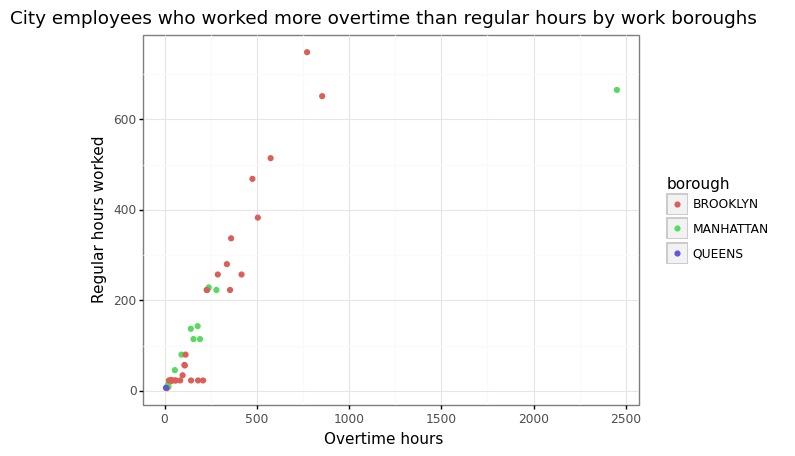

<ggplot: (383769775)>

In [18]:
(
    ggplot(agencies_df.query('reg_hrs > 0'),
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='borough'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by work boroughs",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

### 📓 Observation

`Most of these employees' work location is Brooklyn. Let's see how much overtime of employees with more overtime than regular hours cost the city, broken down by boroughs`

But first, a quick refresher: 

The new dataframe (agencies_df) has employees who worked more in overtime hours than regular hours, sorted by the top three agencies.

In [19]:
agencies_df

,year,payroll_no,agency_name,last_name,first_name,mid_int,start_date,borough,title_desc,leave_status,base_salary,pay_basis,reg_hrs,reg_gross_paid,ot_hrs,ot_paid,other_pay
0,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88"
1,2020,56.00,POLICE DEPARTMENT,SHELLEY,DANIEL,G,1995-04-02,MANHATTAN,SERGEANT-D/A SPECIAL ASSIGNMENT,CEASED,"125,531.00",per Annum,228.60,"13,726.98",240.00,"12,734.04","41,901.84"
2,2020,56.00,POLICE DEPARTMENT,DUQUE,JUAN,D,1996-07-18,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,CEASED,"132,510.00",per Annum,222.88,"15,995.43",281.42,"16,725.79","31,341.92"
3,2020,56.00,POLICE DEPARTMENT,CONNOLLY,BRIAN,W,1984-01-04,MANHATTAN,SERGEANT-D/A SUPERVISOR DETECTIVE SQUAD,CEASED,"125,531.00",per Annum,0.00,0.00,10.50,557.12,"50,826.20"
4,2020,56.00,POLICE DEPARTMENT,GAETA,GEOFFREY,J,1999-07-07,MANHATTAN,LIEUTENANT,CEASED,"128,355.00",per Annum,137.17,"10,235.09",142.67,"8,308.13","28,200.10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2017,NaN,FIRE DEPARTMENT,HOLMES,JOHN,F,2013-06-17,BROOKLYN,EMERGENCY MEDICAL SPECIALIST-EMT,CEASED,"35,727.00",per Annum,-37.50,165.91,0.00,0.00,0.00
280,2017,NaN,FIRE DEPARTMENT,HOPKINS,MICHAEL,W,1994-02-28,BROOKLYN,FIREFIGHTER,CEASED,"82,808.00",per Annum,80.02,"24,791.08",114.00,"15,189.39","-8,330.92"
281,2017,NaN,FIRE DEPARTMENT,LEHMANN JR.,WILLIAM,J,1999-10-15,QUEENS,EMERGENCY MEDICAL SPECIALIST-PARAMEDIC,CEASED,"63,929.00",per Annum,-41.78,49.42,0.00,0.00,-4.66
282,2017,NaN,FIRE DEPARTMENT,SIMONETTI,CHRISTINA,J,2014-02-10,QUEENS,EMERGENCY MEDICAL SPECIALIST-EMT,ACTIVE,"36,799.00",per Annum,-2.13,727.79,0.00,5.41,"3,024.21"


In [20]:
agencies_df.groupby(by='borough').ot_paid.sum()

borough
BRONX            22.50
BROOKLYN    366,417.29
MANHATTAN   263,254.56
QUEENS        1,734.47
Name: ot_paid, dtype: float64

In [21]:
agencies_df.borough.value_counts()

MANHATTAN    149
BROOKLYN      85
QUEENS        40
BRONX         10
Name: borough, dtype: int64

- 85 Brooklyn employees made over $366K in overtime and they worked more overtime than regular hours.
- They also made more than the 149 employees in Manhattan

### 📝 More observations📝

Most of these employees appear to have "ceased" in their leave status. Let's take a closer look at that. Also, let's only include employees who have non-negative regular hours

In [22]:
ceased_df = agencies_df.query('reg_hrs > 0').query('leave_status == "CEASED"')
ceased_df

,year,payroll_no,agency_name,last_name,first_name,mid_int,start_date,borough,title_desc,leave_status,base_salary,pay_basis,reg_hrs,reg_gross_paid,ot_hrs,ot_paid,other_pay
0,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,1995-04-30,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88"
1,2020,56.00,POLICE DEPARTMENT,SHELLEY,DANIEL,G,1995-04-02,MANHATTAN,SERGEANT-D/A SPECIAL ASSIGNMENT,CEASED,"125,531.00",per Annum,228.60,"13,726.98",240.00,"12,734.04","41,901.84"
2,2020,56.00,POLICE DEPARTMENT,DUQUE,JUAN,D,1996-07-18,MANHATTAN,LIEUTENANT D/A COMMANDER OF DETECTIVE SQUAD,CEASED,"132,510.00",per Annum,222.88,"15,995.43",281.42,"16,725.79","31,341.92"
4,2020,56.00,POLICE DEPARTMENT,GAETA,GEOFFREY,J,1999-07-07,MANHATTAN,LIEUTENANT,CEASED,"128,355.00",per Annum,137.17,"10,235.09",142.67,"8,308.13","28,200.10"
6,2020,56.00,POLICE DEPARTMENT,MACDONALD,DAVID,NaN,1998-07-01,MANHATTAN,SERGEANT-,CEASED,"109,360.00",per Annum,142.88,"7,476.68",179.50,"8,938.83","27,891.42"
7,2020,56.00,POLICE DEPARTMENT,DOLAN,DOUGLAS,M,1999-07-16,MANHATTAN,POLICE OFFICER,CEASED,"85,292.00",per Annum,222.88,"9,093.75",227.92,"11,335.60","20,853.30"
8,2020,56.00,POLICE DEPARTMENT,NAGEL,THOMAS,M,1999-07-07,MANHATTAN,SERGEANT-,CEASED,"109,360.00",per Annum,114.30,"5,982.61",192.50,"9,677.85","24,514.31"
9,2020,56.00,POLICE DEPARTMENT,ZAYAS,HENRY,NaN,1999-07-07,MANHATTAN,POLICE OFFICER,CEASED,"85,292.00",per Annum,222.88,"9,093.75",232.58,"10,029.97","20,036.67"
10,2020,56.00,POLICE DEPARTMENT,MAJURI,SERGIO,NaN,1995-04-30,MANHATTAN,POLICE OFFICER D/A DETECTIVE 2ND GR,CEASED,"109,360.00",per Annum,45.72,"2,396.82",56.17,"3,104.02","30,472.96"
11,2020,56.00,POLICE DEPARTMENT,HINES,ROBERT,R,1999-07-07,MANHATTAN,P.O. DA DET GR3,CEASED,"97,324.00",per Annum,114.30,"5,324.17",157.00,"6,545.06","20,744.20"


In [23]:
ceased_df.shape

(40, 17)

#### Observation: 40 employees who worked more overtime than regular hours are no longer working. Let's take a closer look!

In [24]:
ceased_df.ot_paid.mean().round()

14504.0

`Compare this to average overtime earned across all employees`

In [25]:
df.ot_paid.mean().round()

2830.0

# AHHA!

#### 40 employees, worked more overtime than regular, racked up more money, on average, with overtime than all employees combined. These 40 employees are no longer working.

`Where did these 40 employees work and for what agencies?`

In [26]:
ceased_df.borough.value_counts()

BROOKLYN     25
MANHATTAN    14
QUEENS        1
Name: borough, dtype: int64

In [27]:
ceased_df.agency_name.value_counts()

FIRE DEPARTMENT               24
POLICE DEPARTMENT             14
DEPT OF PARKS & RECREATION     2
Name: agency_name, dtype: int64

`Taking a closer look at Brooklyn employees`

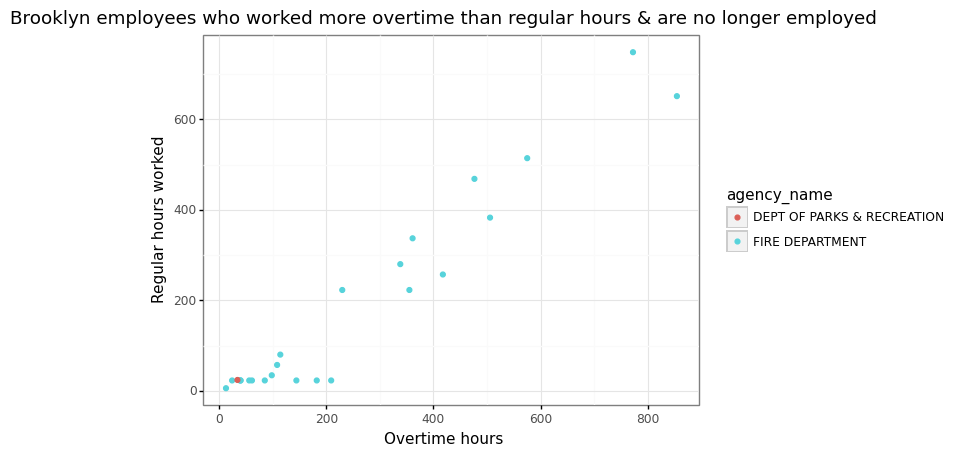

<ggplot: (384048282)>

In [32]:
(
    ggplot(ceased_df.query('borough == "BROOKLYN"'),
        aes('ot_hrs', 'reg_hrs'))
        + geom_point(aes(color='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "Brooklyn employees who worked more overtime than regular hours & are no longer employed",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

## Lots more possibilities, but here's some initial observations /// a quick recap!

### 1. 805 city employees, between 2017-2021 worked more in overtime hours than regular hours
### 2. Most of these employees were from the Police, Fire and Parks & Rec Departments
### 3. While there's one NYPD outlier, most employees were from the fire department, who worked in Brooklyn and are no longer employed
### 4. 85 Brooklyn employees made over $366K in overtime
### 5. 40 employees, worked more overtime than regular, racked up more money, on average, with overtime than all employees combined. These 40 employees are no longer working.